In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_login = pd.read_json('logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_login.set_index(['login_time'], inplace=True)

In [5]:
df_login['count'] = 1

In [6]:
df_login = df_login.sort_values(by='login_time')
df_login.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [7]:
#downsampling
df_resampled = df_login.resample('15T', label='right').sum()
df_resampled.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [8]:
df_resampled.shape

(9788, 1)

In [9]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
df_resampled['time'] = pd.to_datetime(df_resampled.index)

In [11]:
df_resampled

,count,time
login_time,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00
1970-01-01 20:30:00,6,1970-01-01 20:30:00
1970-01-01 20:45:00,9,1970-01-01 20:45:00
1970-01-01 21:00:00,7,1970-01-01 21:00:00
1970-01-01 21:15:00,1,1970-01-01 21:15:00
...,...,...
1970-04-13 18:00:00,5,1970-04-13 18:00:00
1970-04-13 18:15:00,5,1970-04-13 18:15:00
1970-04-13 18:30:00,2,1970-04-13 18:30:00


In [12]:
df_resampled['month'] = df_resampled['time'].dt.month
df_resampled['day'] = df_resampled['time'].dt.day
df_resampled['hour'] = df_resampled['time'].dt.hour
df_resampled['week'] = df_resampled['time'].dt.week
df_resampled['weekday'] = df_resampled['time'].dt.weekday

C:\Users\rutvi\AppData\Local\Temp/ipykernel_26756/211745798.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_resampled['week'] = df_resampled['time'].dt.week


In [13]:
df_resampled

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3
...,...,...,...,...,...,...,...
1970-04-13 18:00:00,5,1970-04-13 18:00:00,4,13,18,16,0
1970-04-13 18:15:00,5,1970-04-13 18:15:00,4,13,18,16,0
1970-04-13 18:30:00,2,1970-04-13 18:30:00,4,13,18,16,0


In [14]:
month_count = df_resampled.groupby('month')['count'].aggregate(np.sum)
month_count

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64

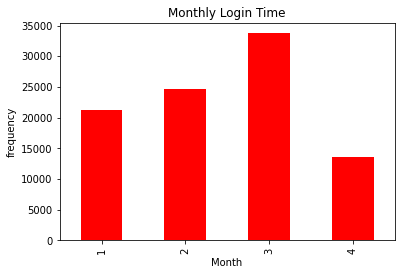

In [15]:
month_count.plot(kind='bar', color='red')
plt.title('Monthly Login Time')
plt.xlabel('Month')
plt.ylabel('frequency')
plt.show()

frequncy is increasing bymonth. But in April, we have only 13 days data so due to unsufficient data, we can't compare April with other month.

In [16]:
week_count = df_resampled.groupby('week')['count'].aggregate(np.sum)
month_count

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64

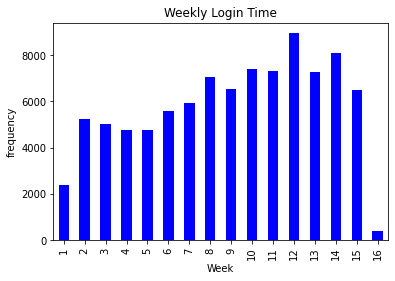

In [17]:
week_count.plot(kind='bar', color='blue')
plt.title('Weekly Login Time')
plt.xlabel('Week')
plt.ylabel('frequency')
plt.show()

Heighest booking is last week of the March, i.e. Week 12

In [18]:
day_count = df_resampled.groupby('weekday')['count'].aggregate(np.sum)
month_count

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64

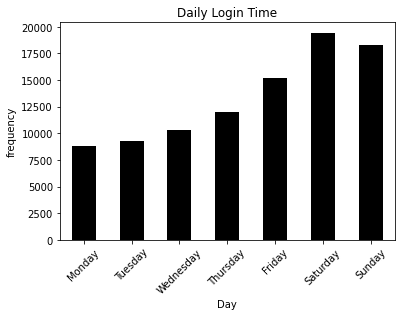

In [22]:
ax = day_count.plot(kind='bar', color='black')
plt.title('Daily Login Time')
plt.xlabel('Day')
plt.ylabel('frequency')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.show()

1970-01-01 is a Thursday. So Saturdays is highest number of logins, second highest is Sundays and thire highest is Fridays.

In [20]:
hour_count = df_resampled.groupby('hour')['count'].aggregate(np.sum)
hour_count.head()

hour
0    5988
1    6302
2    5961
3    5075
4    4722
Name: count, dtype: int64

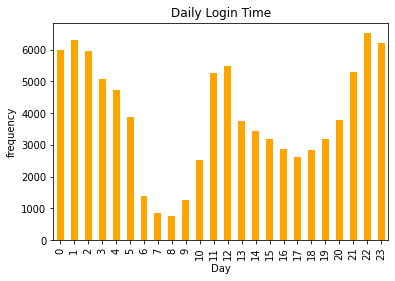

In [21]:
hour_count.plot(kind='bar', color='orange')
plt.title('Daily Login Time')
plt.xlabel('Day')
plt.ylabel('frequency')
#ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

no of Logins increase every month from January to March. highest is in March, as we have insufficient data for month- April.

If you see week's data, 12th week (end of March week) has highest booking.

Saturday and Sundayday have heighest booking in weekday.

demanding hours in a day are 9 pm to 12 pm and least demanding hours are 6 pm to 9 pm.